# Classification
A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”. A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes.


# Logistic Regression

Logistic regression is a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

Linear Regression: $y = b_o + b_1x$  
Sigmoid Function:  $p = \frac{1}{1 + e^{-y}} $  
Using value of y from 1st equation into 2nd  
$ln(\frac{p}{1 - p}) = b_o + b_1x$

Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.




### Issue with Linear Regression

Suppose we need to decide whether on tumor size vs its malignancy. Since it is a classification problem, on plotting,  all the values will lie on 0 and 1. And if we fit best found regression line, by setting the threshold at 0.5, it will give a descent result.
<img src="Image/LR-4.JPG" width="400">

But if we have an outlier, it will go horribly wrong.  
<img src="Image/LR-5.JPG" width="400">

Because of one outlier, whole linear regression prediction is going wrong.


Logistic regression can be understood by standard logistic function. Logistic function is a Sigmoid function, which takes real value between zero and one.  
If we plot sigmoid function, the graph will be S curve. 
When there is an outlier, sigmoid function takes care of it.  
<img src="Image/LR-6.JPG" width="400">
<font size=1><center>Image Source:Towardsdatascience</center></font>

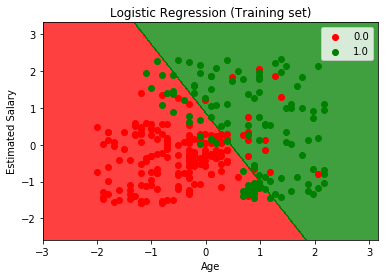

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data\Classification\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X = X.astype(float)
y = y.astype(float)

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic Regression to the Training set
#lbfgs = Limited-memory BFGS  It is a popular algorithm for parameter estimation in machine learning.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs') 
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Confusion Matrix
- Describe the performance of a classification model
- Condition - True values of the test data should be known



In [3]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

[[65  3]
 [ 8 24]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        68
         1.0       0.89      0.75      0.81        32

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



<img src="Image\cm.JPG" width=300>

- Accuracy: Is fraction of correct predictions in all prediction made by model  
- Precision: Is fraction of correct positive predictions in all positive predictions made by the model  
- Recall: Is fraction of correct positive predictions made in actual positive data  

If your data are balanced, i.e. have nearly same number of instance in each class then you can use accuracy, else you can use precision or accuracy based on either classifying instance in positive class or negative class is more important 

Precision = $\frac {TP}{Predicted Yes}$ = 65/73 = 0.89
  
Sensitivity/Recall = $\frac {TP}{Actual Yes}$ = 65/68 = 0.96
  
Accuracy = $\frac {TN+TP}{Total}$ = 89/100 = 0.89
  
Error Rate = $\frac {FN+FP}{Total}$ = 11/100 = 0.11



## Relevance of Confusion Matrix
- Spam Filter (positive class: spam): Optimize for precision or specificity because false negatives (spam goes to inbox) are more acceptable than false positives (non-spam caught by spam filter).

- Fraudulent transaction detector ( positive class: fraud): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)


## Cross Validation

- We usually evaluate training data by test data
- Here idea is to evaluate training data without test data
- You just can’t fit the model to your training data and hope it would accurately work for the real data it has never seen before.

<img src="Image/cv1.png" width="300" />

- Use Test data only for final test
Issue:
- How do we choose the validation set?
- Enough data?
- Mitigate overfitting?
<img src="Image/cv2.png" width="300" />

## K- Fold Cross Validation Steps:
- For each fold, determine best hyper parameter value
- Now take average best value of HP as model HP value
- This will provide HP value good for all set of data
<img src="Image/cv3.png" width="300" />

In [8]:
#Import Libraries
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
%matplotlib inline

#Read the data
df = pd.read_csv("Data/Classification/pima-data.csv")

#Check the Correlation
df.corr()
#Delete the correlated feature
del df['skin']

#Data Molding
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

#Splitting the data
from sklearn.model_selection import train_test_split

#This will copy all columns from 0 to 7(8 - second place counts from 1)
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

#Imputing
from sklearn.impute import SimpleImputer 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)
lr_model.score(X_train,y_train)

0.7728119180633147

lr_model.score(X_train, y_train) is the training accuracy, while  
accuracy_score(y_test, classifier.predict(X_test)) is the testing accuracy.   

.score() method in the LogisticRegression class directly calls the sklearn.metrics.accuracy_score


#### Apply K-Fold Validation

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K Fold =3
kfold = KFold(n_splits=3, random_state=7)

#.ravel will convert that array shape to (n, )
result = cross_val_score(lr_model, X_train, y_train.ravel(), cv=kfold, scoring='accuracy')
print(result.mean())

0.7448789571694601


There is slight decrease in score. This can be improved with hyperparameter tuning/optimization(Grid Search).

# Hyper-Parameter

1. One which is set manually before learning process begins.
2. Hyper-parameters are data dependent & many times need experiments to find the best
3. GridSearch is used to find the best hyper-parameters  
4. hyperparameter is a parameter whose value is used to control the learning process  
  
Examples:
- The learning rate for training a neural network.
- The C and sigma hyperparameters for support vector machines.
- The k in k-nearest neighbors. 

# Grid Search
Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions

In [46]:
from sklearn.model_selection import GridSearchCV
import time


dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train, y_train.ravel())
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.763501 using {'C': 1.5, 'dual': False, 'max_iter': 100}
Execution time: 0.7279989719390869 ms


C:\Users\rishbans\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


There is an increase in the accuracy score, but there is a sufficient amount of growth in the execution time as well. The larger the grid, the more execution time.